In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#EDA1

In [3]:
from google.colab import files
uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [6]:
df1 = pd.read_csv("BIKE DETAILS.csv")

In [7]:
# What is the range of selling prices in the dataset?
price_min = df1['selling_price'].min()
price_max = df1['selling_price'].max()
price_range = price_max - price_min
price_range

755000

In [8]:
# What is the median selling price for bikes in the dataset?
median_price = df1['selling_price'].median()
median_price

45000.0

In [9]:
# "B What is the most common seller type?
common_seller_type = df1['seller_type'].mode()[0]
common_seller_type

'Individual'

In [13]:
#  How many bikes have driven more than 50,000 kilometers?
bikes_above_50000_km = df1[df1['km_driven'] > 50000].shape[0]
bikes_above_50000_km

170

In [11]:
#  What is the average km_driven value for each ownership type?
average_km_driven_by_owner = df1.groupby('owner')['km_driven'].mean()
average_km_driven_by_owner

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [14]:
#  What proportion of bikes are from the year 2015 or older?
bikes_2015_or_older = df1[df1['year'] <= 2015].shape[0]
total_bikes = df1.shape[0]
proportion_2015_or_older = bikes_2015_or_older / total_bikes
proportion_2015_or_older

0.5664467483506126

In [15]:
#What is the trend of missing values across the datasetD
missing_values = df1.isnull().sum()
missing_values_trend = missing_values[missing_values > 0]
missing_values_trend = missing_values_trend.sort_values(ascending=False)
missing_values_trend

,0
ex_showroom_price,435


In [16]:
# What is the highest ex_showroom_price recorded, and for which bikeD
dff = df1[['name' , 'ex_showroom_price']]
dff.sort_values(by='ex_showroom_price', ascending=False, inplace=True)
print(f'The bike with the highest ex-showroom price is:\n{dff.iloc[0]}')

The bike with the highest ex-showroom price is:
name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [17]:
# What is the total number of bikes listed by each seller type?
total_bikes_by_seller = df1['seller_type'].value_counts()
total_bikes_by_seller

,count
seller_type,
Individual,1055
Dealer,6


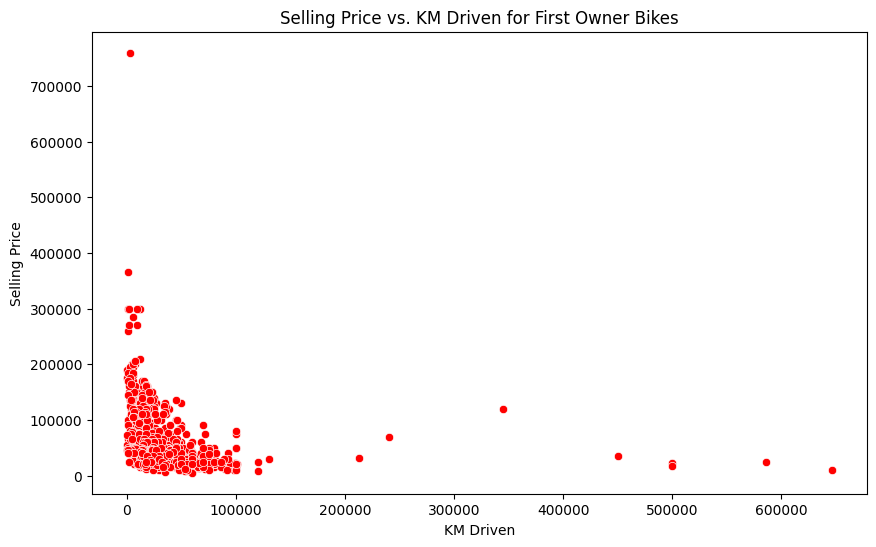

In [21]:
# What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = df1[df1['owner'] == '1st owner']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price', color = 'r')
plt.title('Selling Price vs. KM Driven for First Owner Bikes')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()

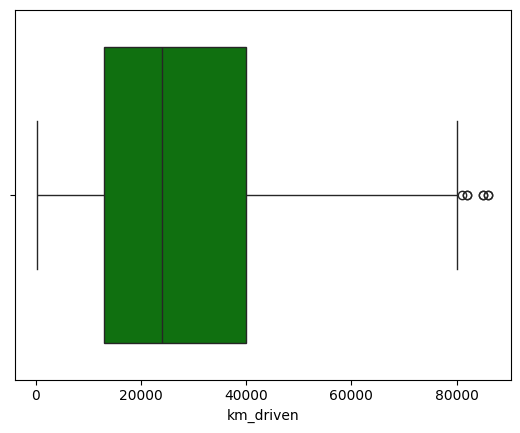

In [22]:
# dentify and remove outliers in the km_driven column using the IQR method
Q1 = df1["km_driven"].quantile(0.25)
Q3 = df1["km_driven"].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (df1["km_driven"] < (Q1 - 1.5 * IQR)) | (df1["km_driven"] > (Q3 + 1.5 * IQR))
df1_no_outliers = df1[~outlier_condition]
sns.boxplot(x=df1_no_outliers['km_driven'], color='g')
plt.show()

<Axes: xlabel='year', ylabel='selling_price'>

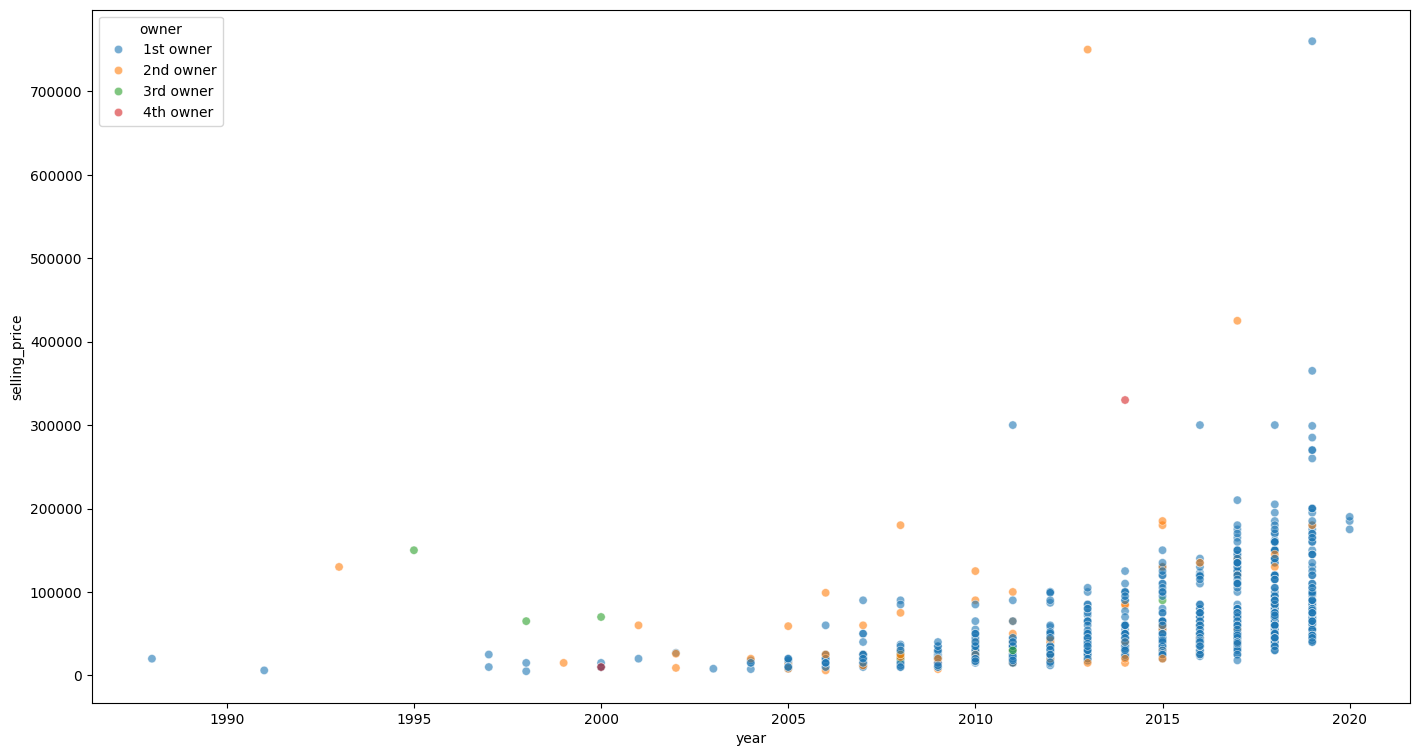

In [26]:
#Perform a bivariate analysis to visualize the relationship between year and selling_price
plt.figure(figsize=(17, 9))
sns.scatterplot(data=df1, x='year', y='selling_price', hue='owner', alpha=0.6)

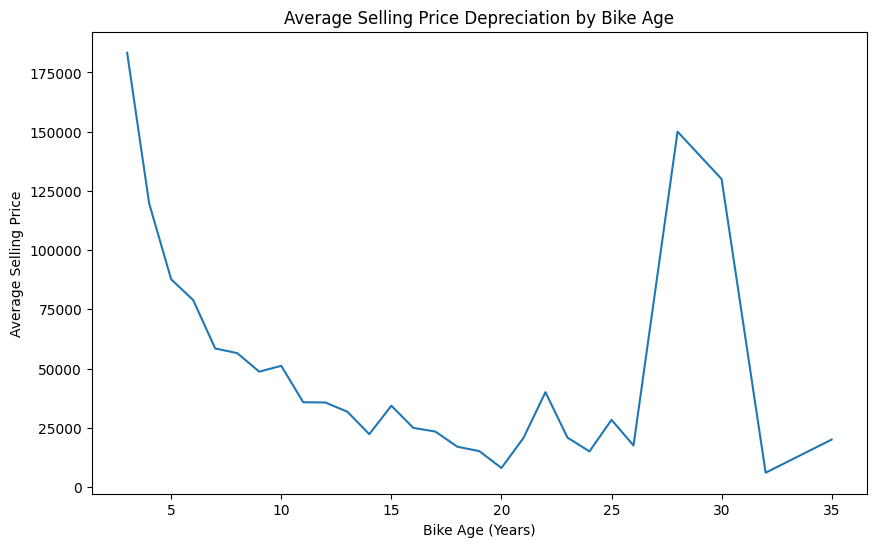

In [27]:
# What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

current_year = 2023
df1['bike_age'] = current_year - df1['year']
average_depreciation = df1.groupby('bike_age')['selling_price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_depreciation, x='bike_age', y='selling_price' )
plt.title('Average Selling Price Depreciation by Bike Age')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Average Selling Price')
plt.show()


In [28]:
# Which bike names are priced significantly above the average price for their manufacturing year?

dff = df1
dff['average_price_by_year']=dff.groupby('year')['selling_price'].transform('mean')
list_of_bikes = dff[dff['selling_price'] > dff['average_price_by_year']]['name'].unique().tolist()
list_of_bikes

['Royal Enfield Classic 350',
 'Royal Enfield Classic Gunmetal Grey',
 'Yamaha Fazer FI V 2.0 [2016-2018]',
 'Royal Enfield Bullet 350 [2007-2011]',
 'Yamaha YZF R3',
 'Jawa 42',
 'Hero Honda Glamour',
 'Yamaha YZF R15 S',
 'Yamaha FZ25',
 'Jawa Standard',
 'Royal Enfield Thunderbird 350',
 'Honda CBR-250R',
 'Bajaj Dominar 400',
 'KTM 390 Duke',
 'Yamaha FZ16',
 'Royal Enfield Electra 5 S',
 'Hero Honda Passion Plus',
 'Royal Enfield Bullet 350',
 'Bajaj Pulsar 150 [2001-2011]',
 'Hero Xtreme Sports',
 'Honda CB Hornet 160R',
 'Royal Enfield Electra 4 S',
 'Mahindra Mojo XT300',
 'Bajaj Pulsar AS200',
 'Royal Enfield Thunderbird 350X',
 'Suzuki Intruder 150',
 'Hero Honda Karizma ZMR [2010]',
 'Honda CB Unicorn 150',
 'Hero Honda CD Deluxe',
 'Royal Enfield Classic Desert Storm',
 'TVS Apache RTR 200 4V',
 'UM Renegade Commando',
 'Royal Enfield Continental GT 650',
 'Honda Activa 3G',
 'Harley-Davidson Street Bob',
 'KTM 390 Duke ABS [2013-2016]',
 'KTM 200 Duke',
 'Royal Enfield Cla

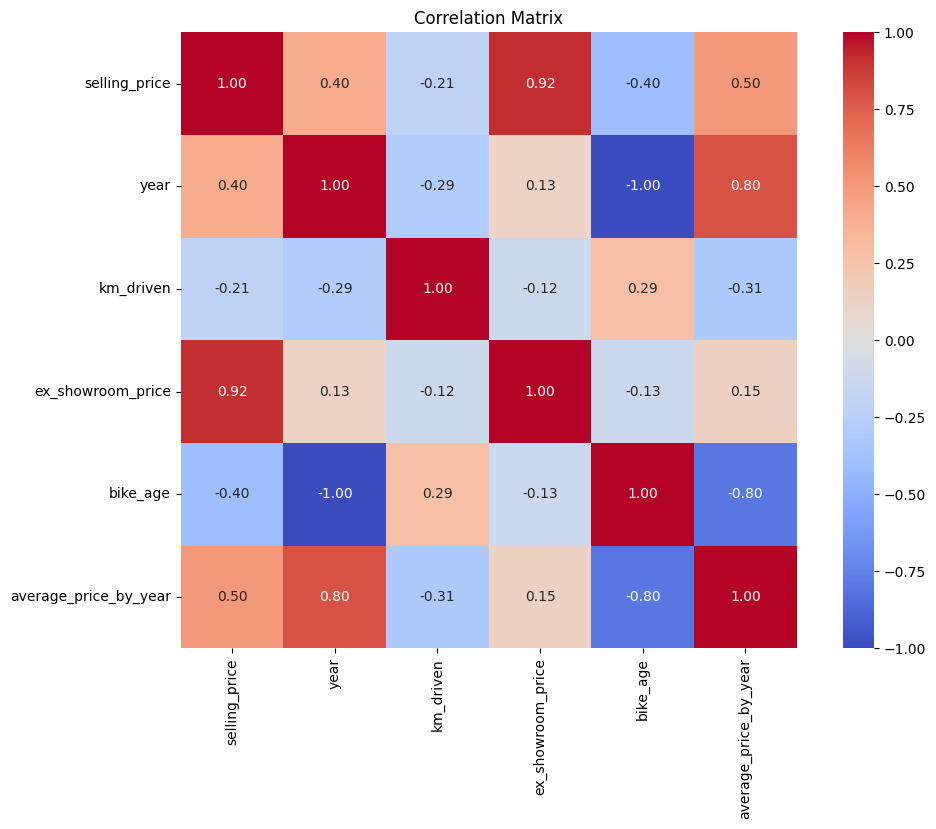

In [29]:
#  Develop a correlation matrix for numeric columns and visualize it using a heatmap
correlation_matrix = df1.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

#EDA 2

In [30]:
from google.colab import files
uploaded = files.upload()

Saving Car Sale.csv to Car Sale.csv


In [31]:
df2 = pd.read_csv("Car Sale.csv")

                                        Dealer_Name     Price ($)
27                                        U-Haul CO  28769.919006
5                                     Classic Chevy  28602.014446
19                             Rabun Used Car Sales  28527.536177
11                                  Iceberg Rentals  28522.958533
8                             Enterprise Rent A Car  28312.580800
23                Scrivener Performance Engineering  28297.371589
9                        Gartner Buick Hyundai Saab  28247.621019
22                                 Saab-Belle Dodge  28190.139888
2                                       Capitol KIA  28189.703822
20                                    Race Car Help  28163.372706
4                            Chrysler of Tri-Cities  28123.091054
24                             Star Enterprises Inc  28113.055244
25                                    Suburban Ford  28112.206758
1                                  C & M Motors Inc  28111.755200
26        

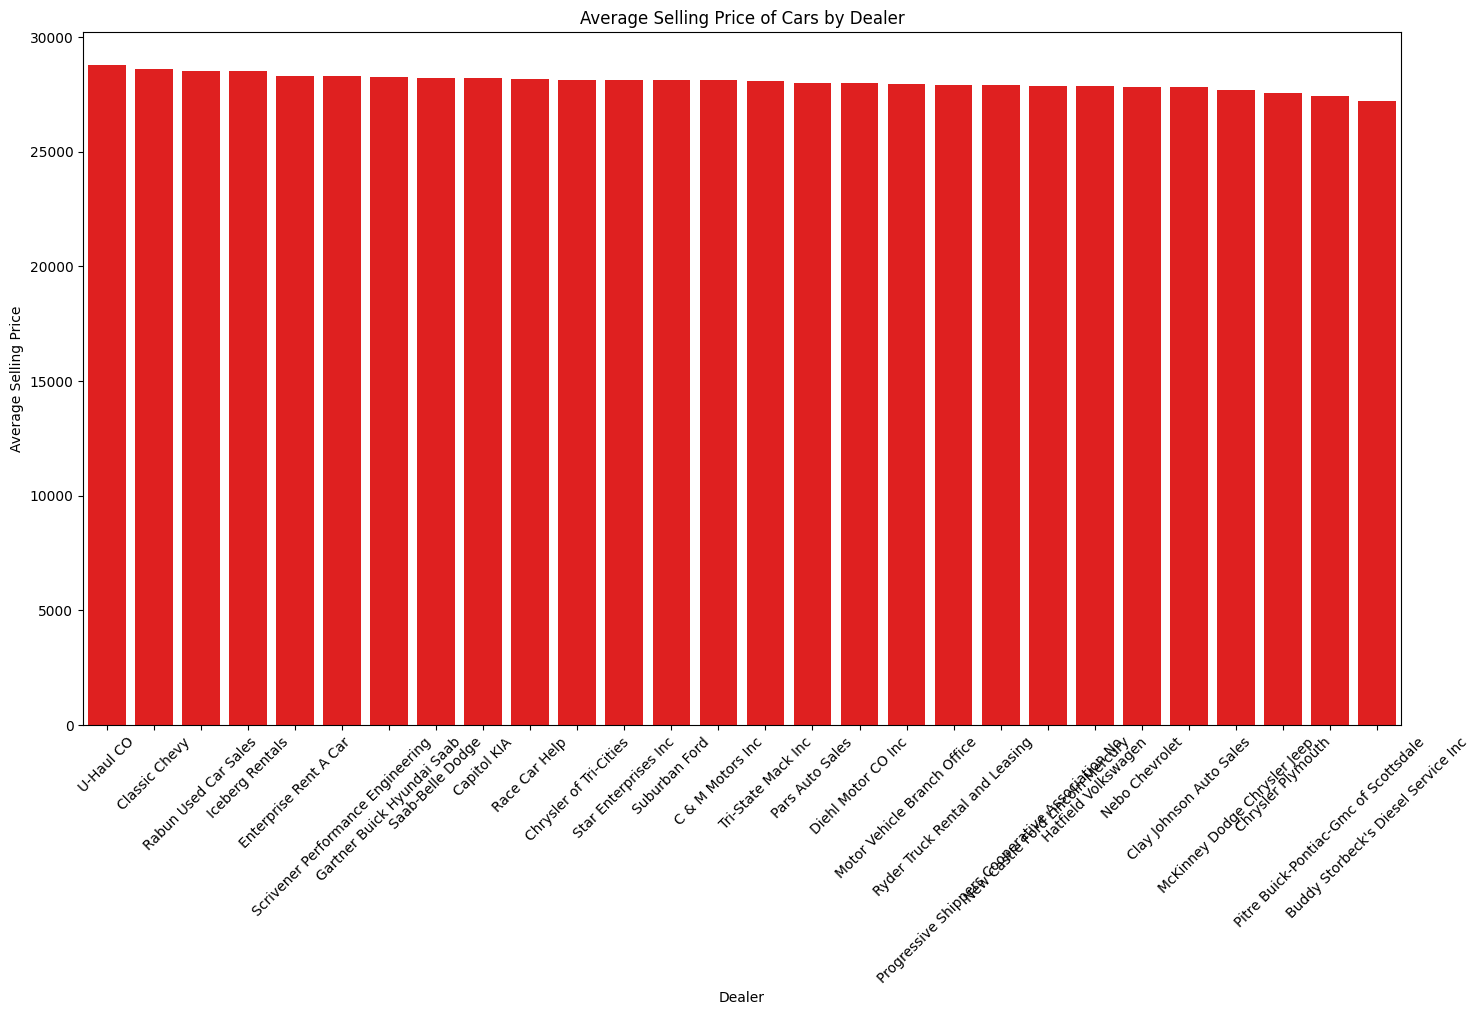

In [34]:
#  What is the average selling price of cars for each dealer, and how does it compare across different dealers?

average_price_by_dealer = df2.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
average_price_by_dealer.sort_values(by='Price ($)', ascending=False, inplace=True)
print(average_price_by_dealer)
plt.figure(figsize=(17, 9))
sns.barplot(data=average_price_by_dealer, x='Dealer_Name', y='Price ($)', color = 'r')
plt.title('Average Selling Price of Cars by Dealer')
plt.xlabel('Dealer')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

price_variation_by_brand = df2.groupby('Company')['Price ($)'].std().reset_index()
price_variation_by_brand.sort_values(by='Price ($)', ascending=False, inplace=True)
# print car brand with highest variation
highest_variation_brand = price_variation_by_brand.iloc[0]
print(f"The car brand with the highest variation in prices is {highest_variation_brand['Company']} with a standard deviation of {highest_variation_brand['Price ($)']:.3f}.")


# The high variation in prices for this brand suggests that there is a wide range of models and features available, leading to significant differences in pricing. This could indicate a diverse product lineup catering to different market segments, from budget-friendly options to luxury models.

The car brand with the highest variation in prices is Lincoln with a standard deviation of 19658.050.


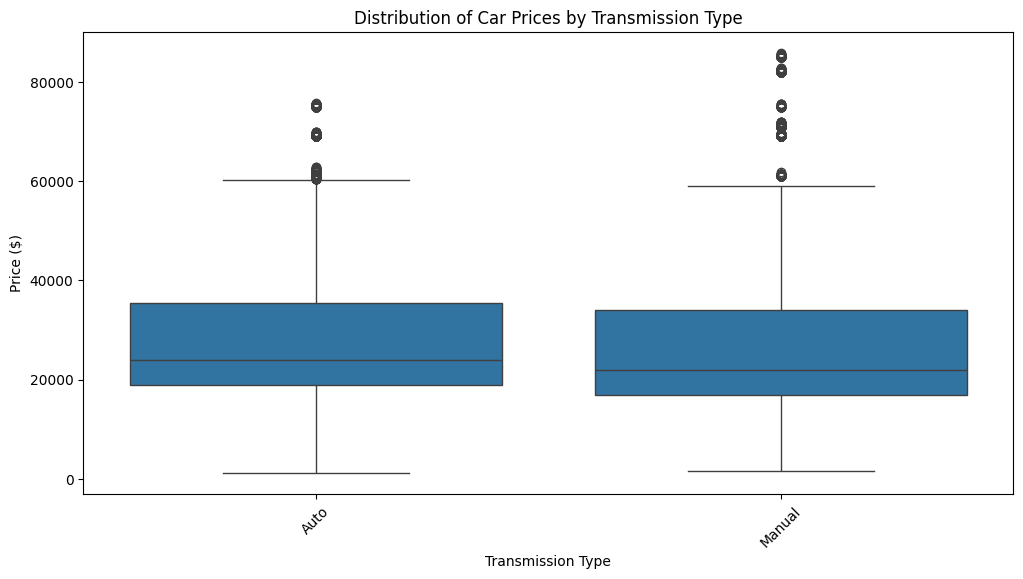

In [36]:
#  What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2, x='Transmission', y='Price ($)')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

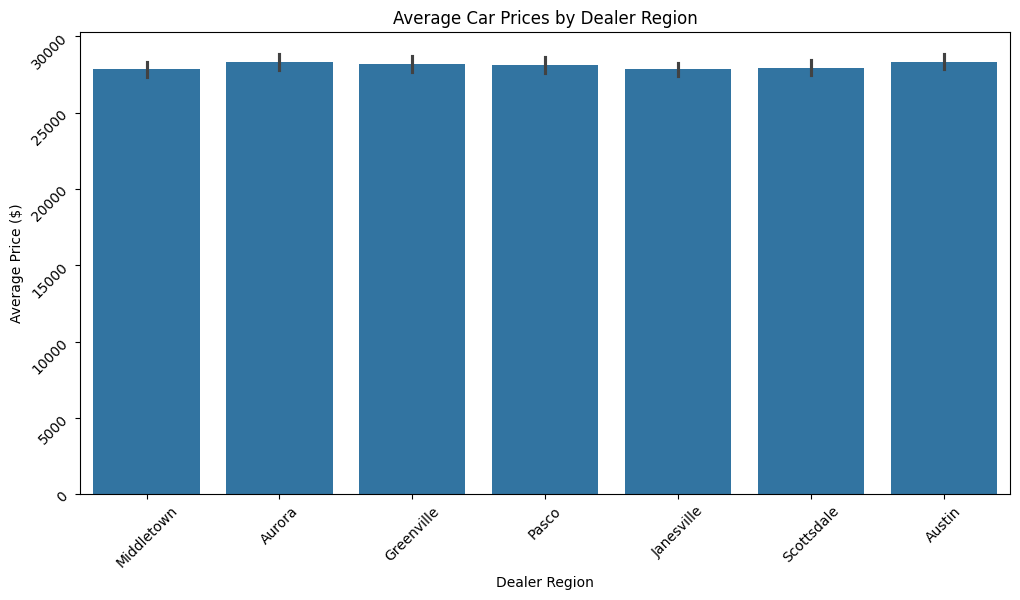

In [37]:
# What is the distribution of car prices across different regions?
plt.figure(figsize=(12, 6))
sns.barplot(data=df2, x='Dealer_Region', y='Price ($)', estimator=np.mean)
plt.title('Average Car Prices by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

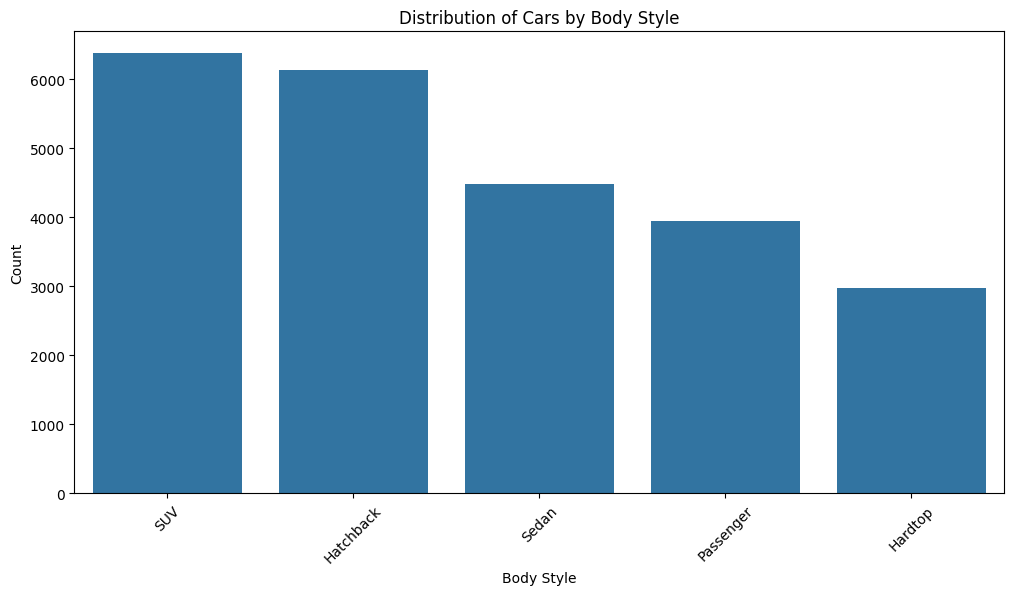

In [38]:
# what is distribution of car based on body style?
plt.figure(figsize=(12, 6))
sns.countplot(data=df2 , x='Body Style' ,order=df2['Body Style'].value_counts().index)
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

    Gender Income Range     Price ($)
0   Female        0-50k  28132.038732
1   Female     50k-100k           NaN
2   Female    100k-500k  28635.027119
3   Female      500k-1M  28070.242135
4   Female      1M-1.5M  28813.466234
5   Female      1.5M-2M  27612.676768
6     Male        0-50k  27816.302247
7     Male     50k-100k  43000.000000
8     Male    100k-500k  28537.169450
9     Male      500k-1M  27993.611332
10    Male      1M-1.5M  28061.788418
11    Male      1.5M-2M  27609.042500


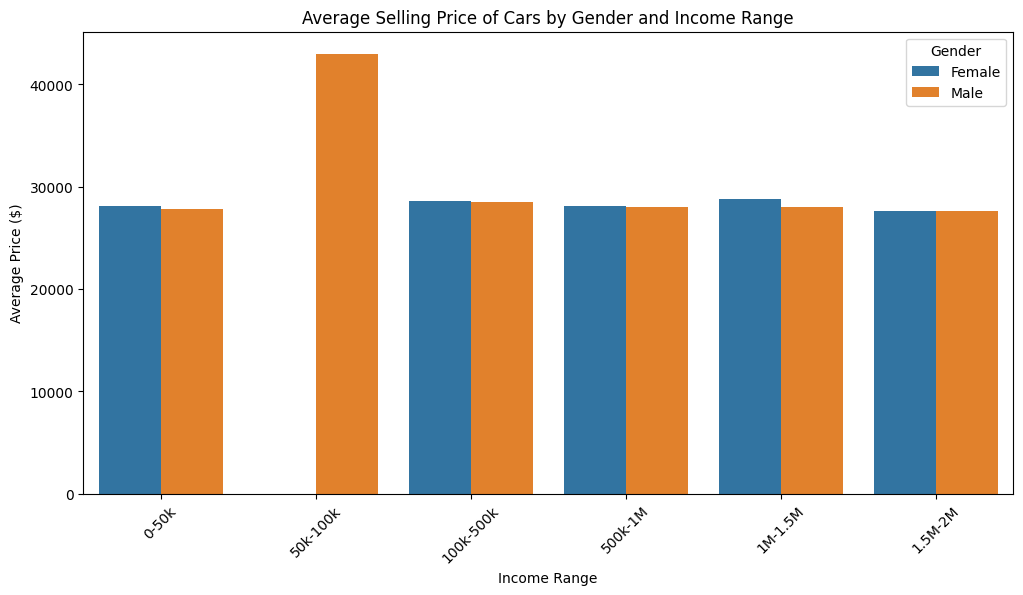

In [39]:
#  How does the average selling price of cars vary by customer gender and annual income?
income_bins = [0, 50000, 100000, 500000, 1000000, 1500000, 2000000]
income_labels = ['0-50k', '50k-100k', '100k-500k', '500k-1M', '1M-1.5M', '1.5M-2M']
df2['Income Range'] = pd.cut(df2['Annual Income'], bins=income_bins, labels=income_labels)

# Group by Gender and Income Range to calculate average selling price
result = df2.groupby(['Gender', 'Income Range'])['Price ($)'].mean().reset_index()

# Show result
print(result)
# Plotting the average selling price
plt.figure(figsize=(12, 6))
sns.barplot(data=result, x='Income Range', y='Price ($)', hue='Gender', estimator=np.mean)
plt.title('Average Selling Price of Cars by Gender and Income Range')
plt.xlabel('Income Range')
plt.ylabel('Average Price ($)')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

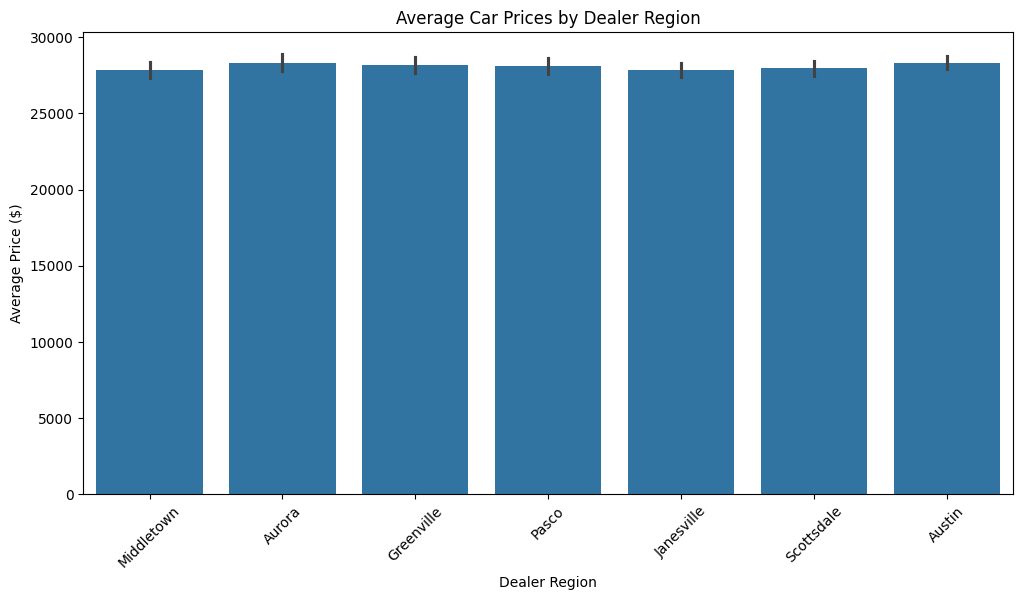

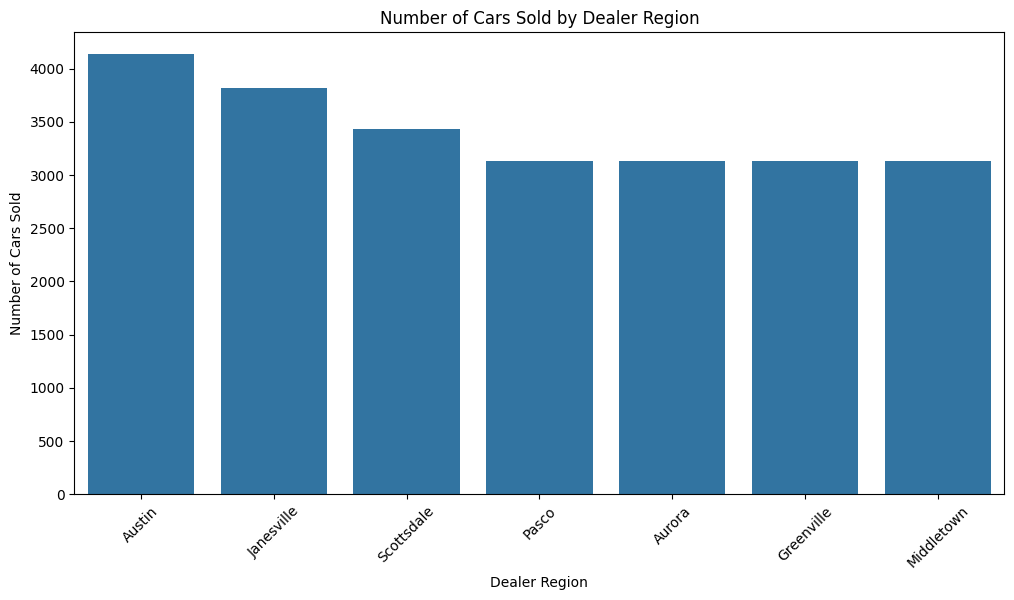

In [40]:
#  What is the distrib?ution of car prices by region, and how does the number of cars sold vary by region
plt.figure(figsize=(12, 6))
sns.barplot(data=df2, x='Dealer_Region', y='Price ($)', estimator=np.mean)
plt.title('Average Car Prices by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()
# Count of cars sold by region
cars_sold_by_region = df2['Dealer_Region'].value_counts().reset_index()
cars_sold_by_region.columns = ['Dealer_Region', 'Number of Cars Sold']
plt.figure(figsize=(12, 6))
sns.barplot(data=cars_sold_by_region, x='Dealer_Region', y='Number of Cars Sold')
plt.title('Number of Cars Sold by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Engine'>

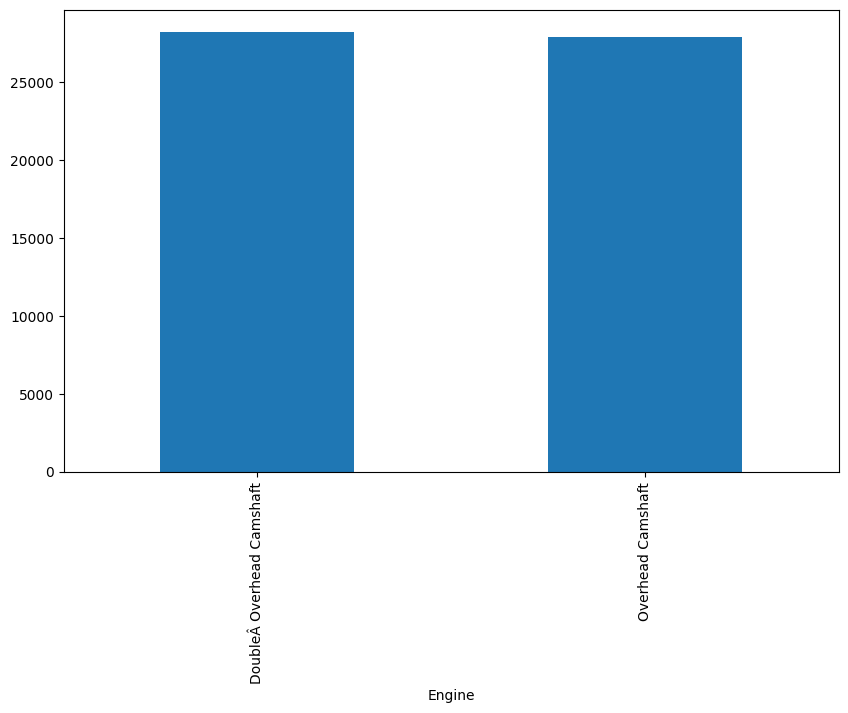

In [41]:
#How does the average car price differ between cars with different engine size?

df2.groupby('Engine')['Price ($)'].mean().plot(kind='bar', figsize=(10, 6))

  Income Range     Price ($)
0        0-50k  27884.297820
1     50k-100k  43000.000000
2    100k-500k  28563.329860
3      500k-1M  28011.726423
4      1M-1.5M  28196.078886
5      1.5M-2M  27609.611492


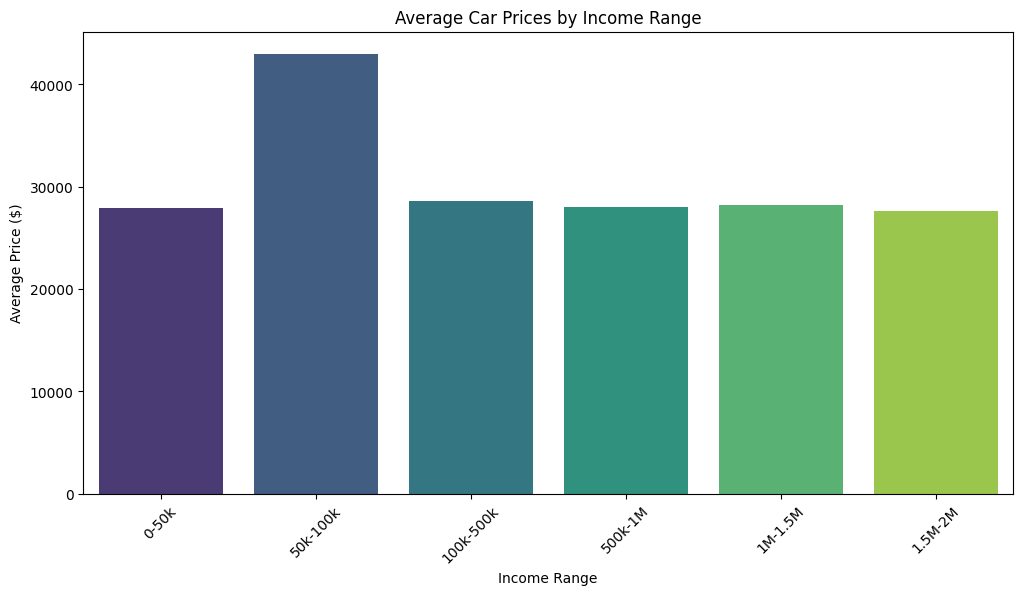

In [42]:
#  How do car prices vary based on the customer’s annual income bracket?
income_bins= [0,50000,100000,500000,1000000,1500000,2000000]
income_labels = ['0-50k', '50k-100k', '100k-500k', '500k-1M', '1M-1.5M', '1.5M-2M']
df2['Income Range'] = pd.cut(df2['Annual Income'],bins=income_bins, labels=income_labels)
# Group by Income Range to calculate average selling price
average_price_by_income = df2.groupby('Income Range')['Price ($)'].mean().reset_index()
# Show result
print(average_price_by_income)
# Plotting the average selling price by income range
plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_by_income, x='Income Range', y='Price ($)', palette='viridis')
plt.title('Average Car Prices by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

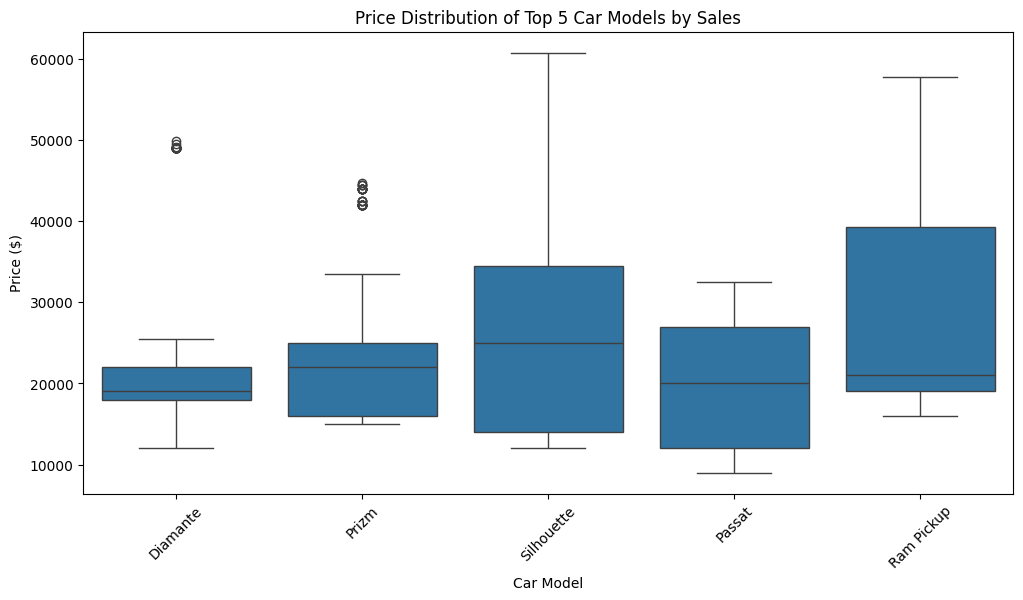

In [43]:
top_5_models = df2['Model'].value_counts().head(5).index.tolist()
top_5_data = df2[df2['Model'].isin(top_5_models)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_5_data, x='Model', y='Price ($)', order=top_5_models)
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

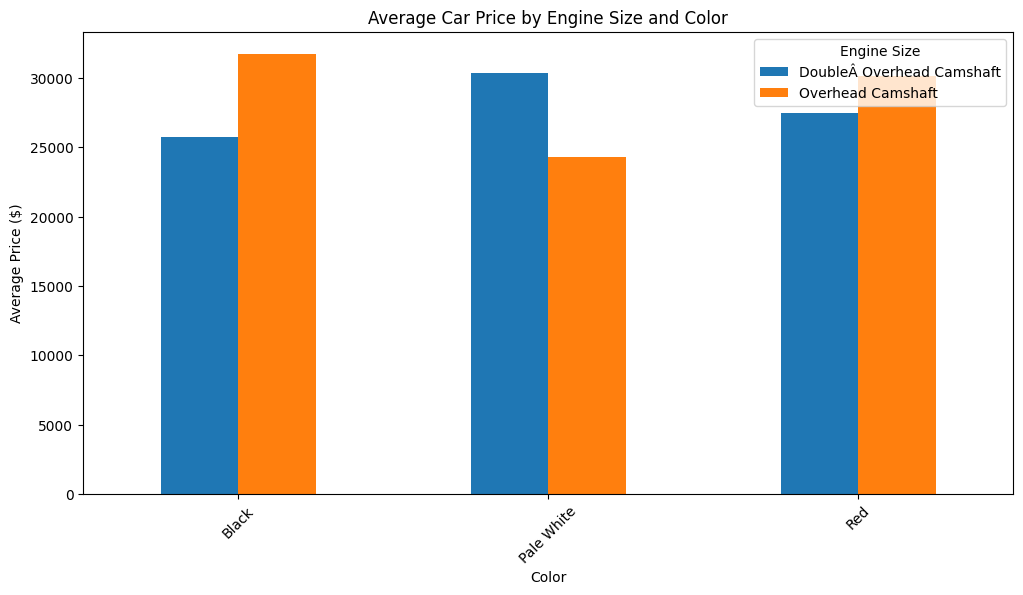

The color with the highest price variation is Red with a standard deviation of 15519.36.


In [44]:
 # How does car price vary with engine size across different car colors, and which colors have the highest price variation?

df2.groupby(['Color', 'Engine'])['Price ($)'].mean().unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Average Car Price by Engine Size and Color')
plt.xlabel('Color')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Engine Size')
plt.show()

# which color is highest price variation?
price_variation_by_color = df2.groupby('Color')['Price ($)'].std().reset_index()
price_variation_by_color.sort_values(by='Price ($)', ascending=False, inplace=True)
highest_variation_color = price_variation_by_color.iloc[0]
print(f"The color with the highest price variation is {highest_variation_color['Color']} with a standard deviation of {highest_variation_color['Price ($)']:.2f}.")

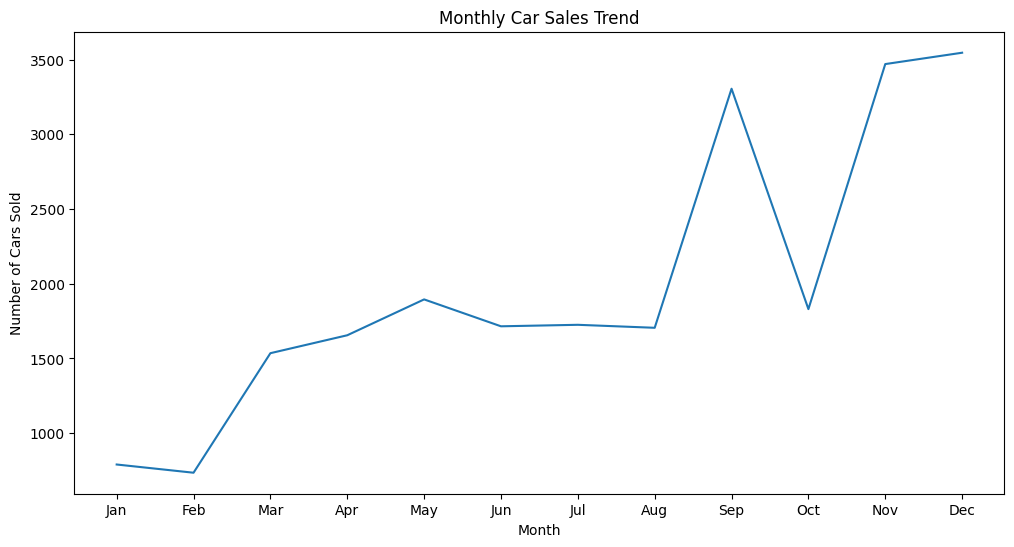

In [45]:
# Is there any seasonal trend in car sales based on the date of sale?
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Month'] = df2['Date'].dt.month
monthly_sales = df2.groupby('Month')['Price ($)'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Price ($)')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
# so it is clear that there is a seasonal trend in car sales, with peaks in certain months. This could be due to various factors such as holidays, promotions, or seasonal demand for specific types of vehicles.

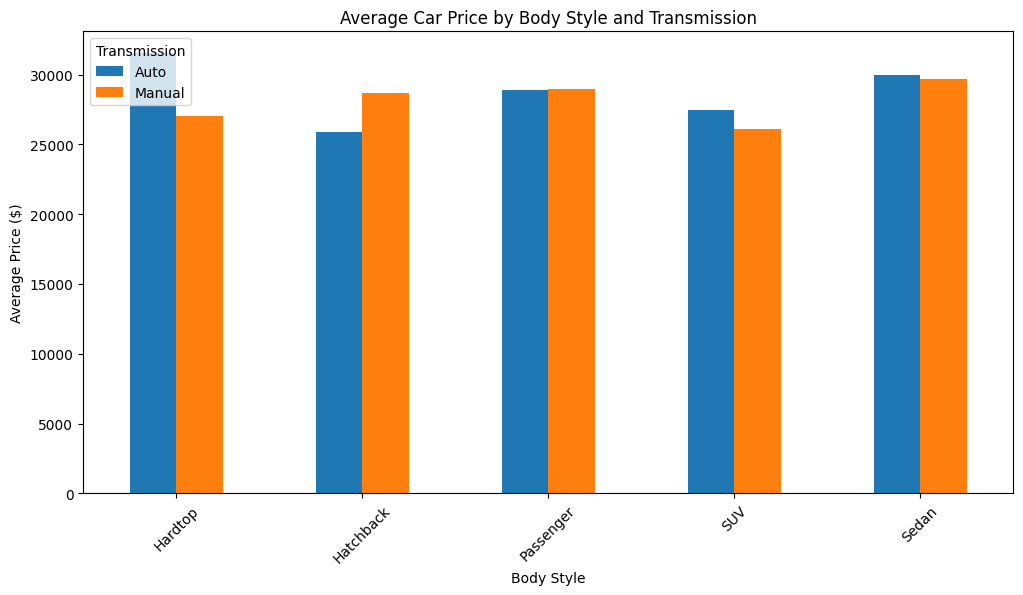

In [46]:
df2.groupby(['Body Style', 'Transmission'])['Price ($)'].mean().unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Average Car Price by Body Style and Transmission')
plt.xlabel('Body Style')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Transmission')
plt.show()

In [48]:
df2['Engine'].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [49]:
#  What is the correlation between car price, engine size, and annual income of customers, and how do these features interact with each other?
correlation_matrix_cars = df2[['Price ($)', 'Engine', 'Annual Income']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_cars, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix for Car Price, Engine Size, and Annual Income")
plt.show()

ValueError: could not convert string to float: 'DoubleÂ\xa0Overhead Camshaft'

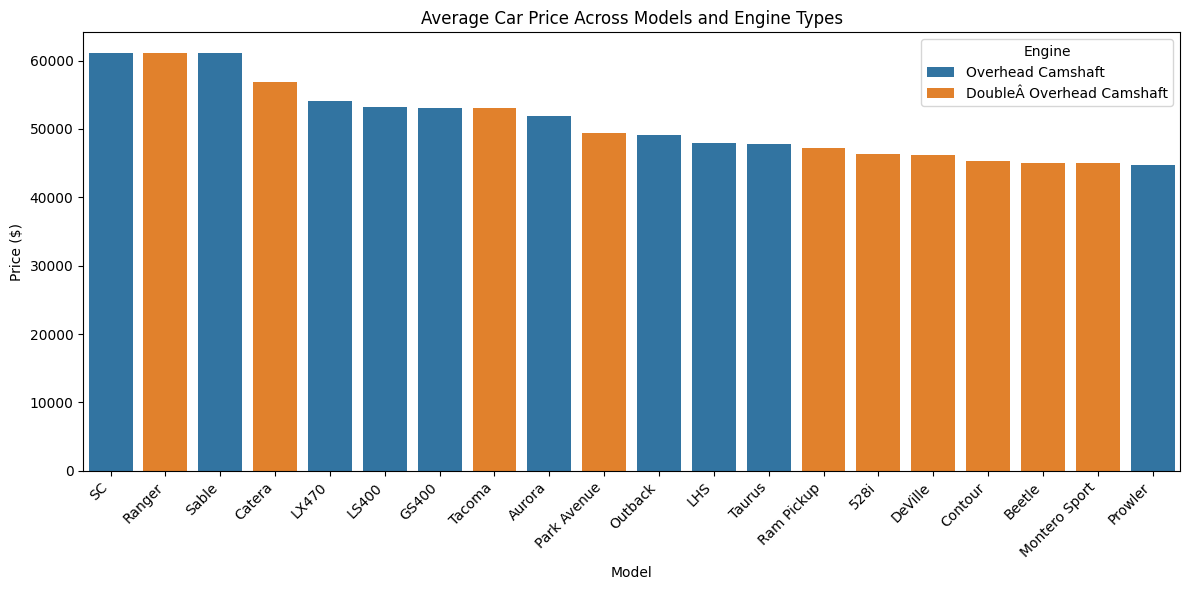

In [50]:
avg_price = df2.groupby(['Model','Engine'])['Price ($)'].mean().reset_index()
avg_price = avg_price.sort_values(by='Price ($)', ascending=False).head(20)  # Top 20 for better plot readability

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price, x='Model', y='Price ($)', hue='Engine')
plt.xticks(rotation=45, ha='right')
plt.title('Average Car Price Across Models and Engine Types')
plt.tight_layout()
plt.show()

#EDA 3

In [51]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [53]:
df3 = pd.read_csv('amazon.csv')

In [54]:
df3['rating'].unique()
df3['rating'] = df3['rating'][df3['rating'] != '|'].astype(float)

In [55]:
# what is average rating for each category?
df3.groupby('category')['rating'].mean().sort_values(ascending=False)

,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Computers&Accessories|Components|Memory,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5
...,...
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.6
"Electronics|HomeTheater,TV&Video|Accessories|3DGlasses",3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.5


In [56]:
df3.dropna(subset=['rating_count'], inplace=True)

In [57]:
df3['rating_count'] = df3['rating_count'].str.replace(',','')

In [58]:
df3['rating_count'] = df3['rating_count'].astype(int)

In [59]:
# what are the top rating_count products in by category?
top_rating_count = df3.groupby('category')['rating_count'].max().reset_index()
top_rating_count.sort_values(by='rating_count', ascending=False, inplace=True)
top_rating_count.head(10)

,category,rating_count
89,"Electronics|HomeTheater,TV&Video|Accessories|C...",426973
76,"Electronics|Headphones,Earbuds&Accessories|Hea...",363713
117,Electronics|Mobiles&Accessories|Smartphones&Ba...,313836
145,Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...,270563
42,Computers&Accessories|ExternalDevices&DataStor...,253105
58,Electronics|Accessories|MemoryCards|MicroSD,205052
49,Computers&Accessories|NetworkingDevices|Networ...,179692
103,Electronics|Mobiles&Accessories|MobileAccessor...,178912
10,Computers&Accessories|Accessories&Peripherals|...,178817
50,Computers&Accessories|NetworkingDevices|Repeat...,156638


In [60]:
df3['discounted_price'] = df3['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df3['actual_price'] = df3['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

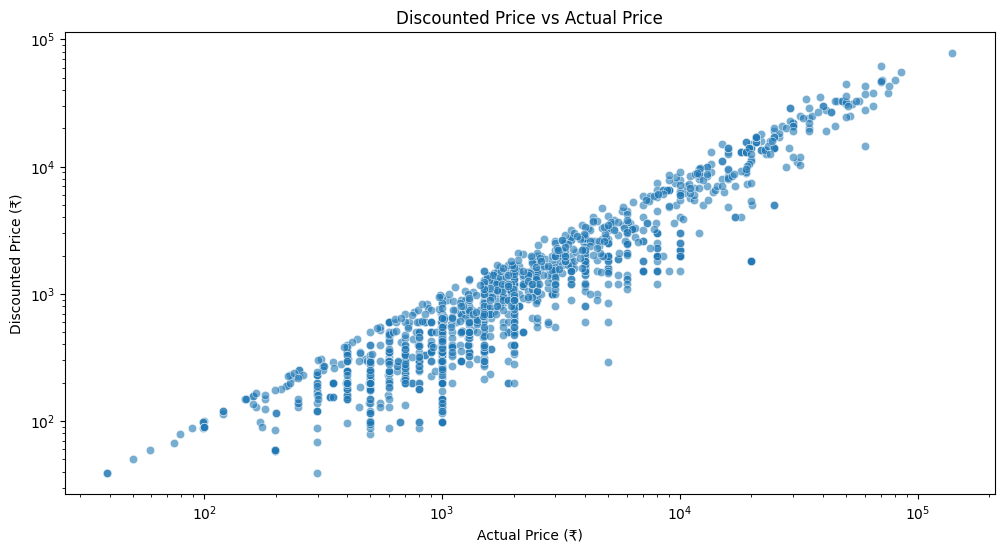

In [61]:
# what is the distribution of discounted price vs actual price?
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df3, x='actual_price', y='discounted_price', alpha=0.6)
plt.title('Discounted Price vs Actual Price')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Discounted Price (₹)')
plt.xscale('log')
plt.yscale('log')
plt.show()

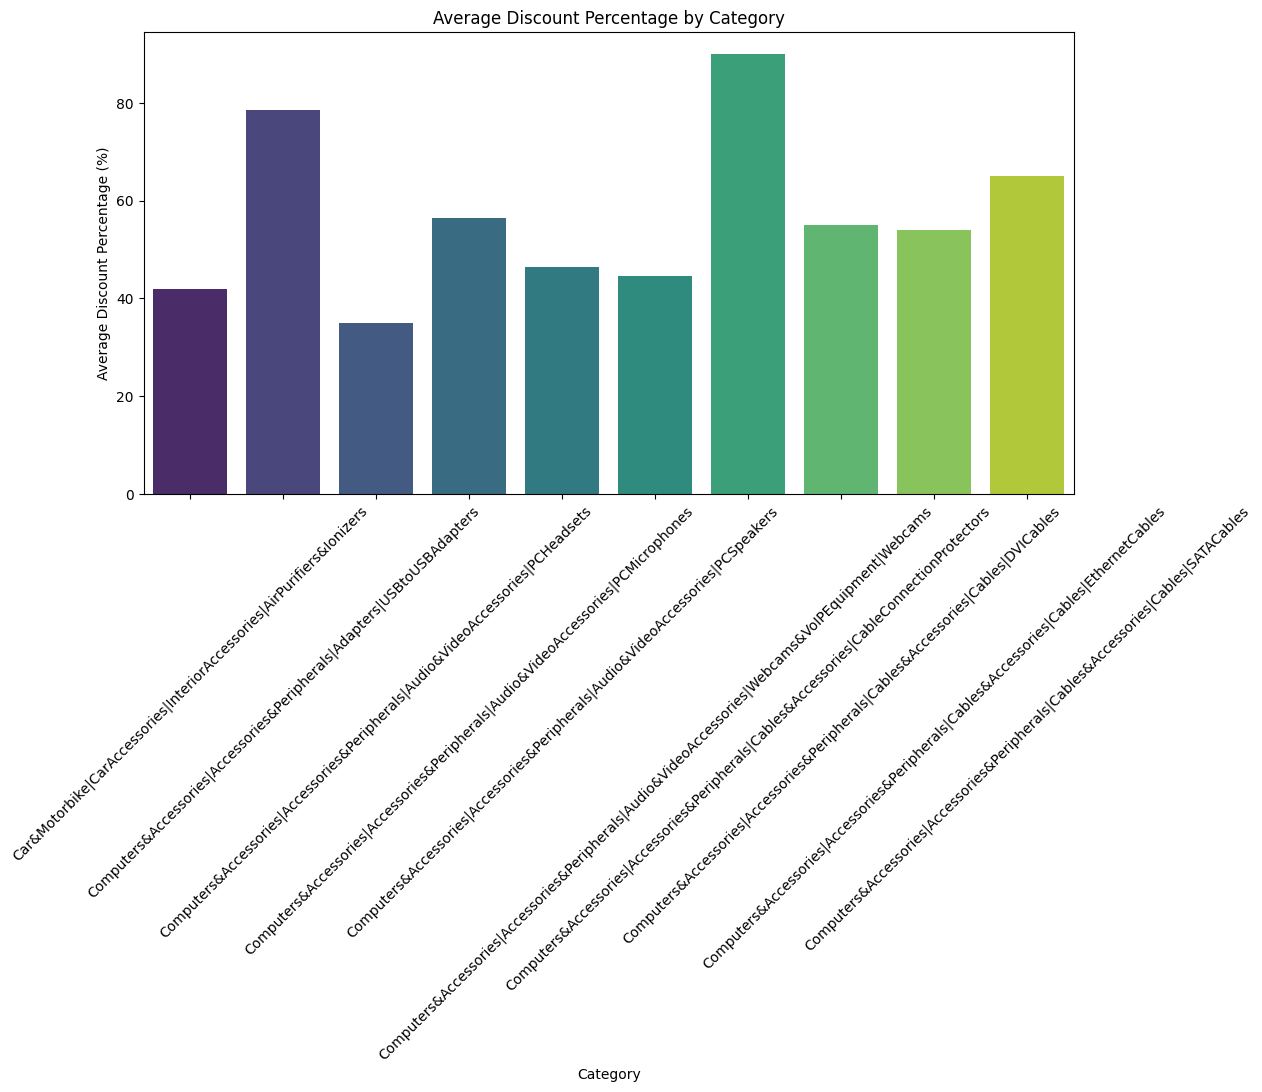

In [67]:
# how does average discount percentage vary across categories?

# df3['discount_percentage'] = df3['discount_percentage'].str.replace('%', '').astype(float)
average_discount_by_category = df3.groupby('category')['discount_percentage'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=average_discount_by_category.head(10), x='category', y='discount_percentage', palette='viridis')
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage (%)')
plt.xticks(rotation=45)
plt.show()

In [68]:
#  What are the most popular product names?
top_products = df3.groupby('product_name')['rating_count'].sum().reset_index()
top_products.sort_values(by='rating_count', ascending=False , inplace=True)
top_products.head(10)

,product_name,rating_count
100,AmazonBasics Flexible Premium HDMI Cable (Blac...,853945
76,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973
75,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973
510,"JBL C100SI Wired In Ear Headphones with Mic, J...",385177
1254,boAt Bassheads 100 in Ear Wired Earphones with...,363713
1255,boAt Bassheads 100 in Ear Wired Earphones with...,363713
1251,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711
896,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836
898,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836
899,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",313832


In [69]:
#  What are the most popular product keywords?
top_keywords = df3['product_name'].str.split().explode().value_counts().reset_index().sort_values(by='count', ascending=False)
top_keywords.columns = ['keyword', 'count']
top_keywords.head(10)

,keyword,count
0,with,717
1,for,614
2,|,456
3,&,432
4,USB,342
5,and,310
6,Cable,304
7,-,218
8,Charging,210
9,Fast,206


In [70]:
# What are the most popular product reviews?
top_reviews = df3.sort_values(by='rating_count', ascending=False)[
    ['product_name', 'rating', 'rating_count', 'review_title', 'review_content']
].reset_index(drop=True).head(10)

top_reviews

,product_name,rating,rating_count,review_title,review_content
0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",4.4,426973,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...
1,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",4.4,426973,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...
2,AmazonBasics Flexible Premium HDMI Cable (Blac...,4.4,426973,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...
3,AmazonBasics Flexible Premium HDMI Cable (Blac...,4.4,426972,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...
4,boAt Bassheads 100 in Ear Wired Earphones with...,4.1,363713,"Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...
5,boAt Bassheads 100 in Ear Wired Earphones with...,4.1,363713,"Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...
6,boAt BassHeads 100 in-Ear Wired Headphones wit...,4.1,363711,"Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...
7,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",4.1,313836,"Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...
8,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",4.1,313836,"Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...
9,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",4.1,313832,"Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...


In [71]:
# what is correlation between discounted price and rating?
corr_btw_discounted_and_rating = df3[['discounted_price', 'rating']].corr().iloc[0, 1]
print(f"Correlation between discounted price and rating: {corr_btw_discounted_and_rating:.2f}")

Correlation between discounted price and rating: 0.12


In [72]:
# what are the top 5 categories based on the highest rating?
top_categories_by_rating = df3.groupby('category')['rating'].mean().reset_index()
top_categories_by_rating.sort_values(by='rating', ascending=False, inplace=True)
top_categories_by_rating.head(5)

,category,rating
57,Computers&Accessories|Tablets,4.6
48,Computers&Accessories|NetworkingDevices|Networ...,4.5
62,Electronics|Cameras&Photography|Accessories|Film,4.5
38,Computers&Accessories|Components|Memory,4.5
81,Electronics|HomeAudio|MediaStreamingDevices|St...,4.5


In [ ]:
#  Identify any potential areas for improvement or optimization based on the data analysis
# Potential areas for improvement or optimization based on the data analysis:
# 1. **Product Pricing**: Analyze the pricing strategy for products with high ratings but low sales. Consider adjusting prices or offering discounts to boost sales.
# 2. **Inventory Management**: Identify categories with high demand but low stock levels. Optimize inventory to ensure popular products are always available.

#EDA 4


In [73]:
from google.colab import files
uploaded = files.upload()


Saving spotify.csv to spotify.csv


In [74]:
df4 = pd.read_csv("spotify.csv")

In [75]:
# Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
df4.drop_duplicates(inplace=True)
df4.isna().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


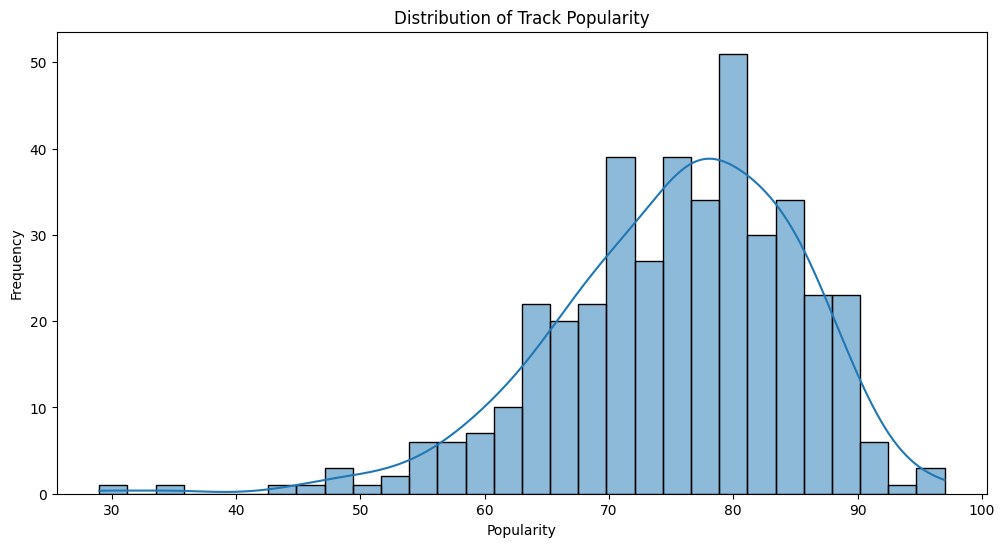

In [76]:
# What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(df4['Popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

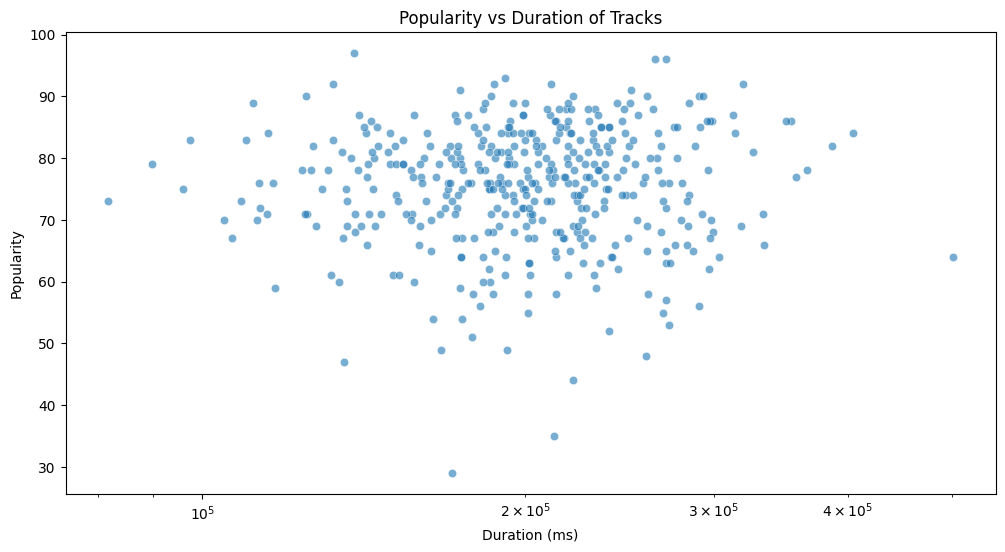

In [77]:
# Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df4 , x= 'Duration (ms)', y='Popularity', alpha=0.6,palette='viridis')
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.xscale('log')
plt.show()

the highest number of tracks by artist is:
Artist              Drake
Number of Tracks       17
Name: 0, dtype: object


<Axes: xlabel='Artist', ylabel='count'>

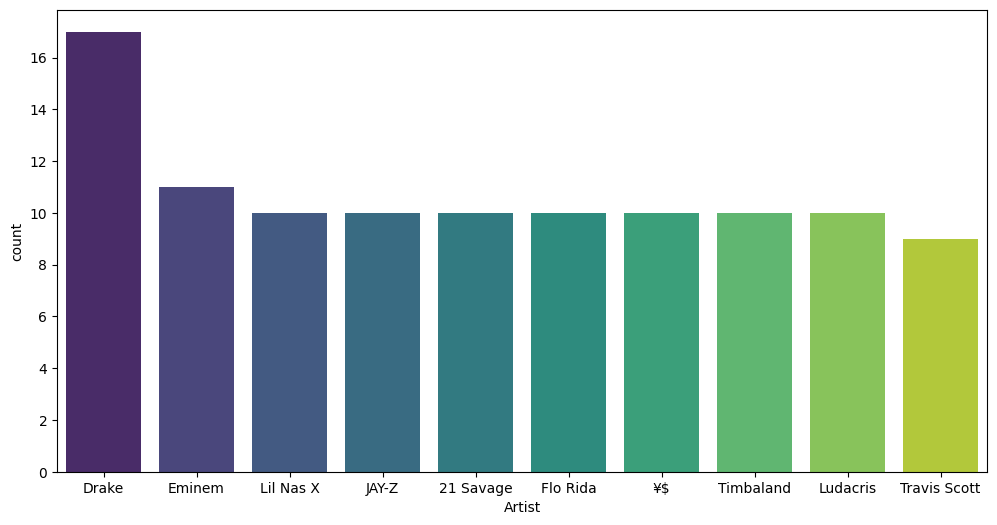

In [78]:
#  Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using countplot
top_artist = df4.groupby("Artist")['Track Name'].count().sort_values(ascending=False)
top_artist.rename('Number of Tracks', inplace=True)
top_artist = top_artist.reset_index()
print("the highest number of tracks by artist is:")
print(top_artist.iloc[0])

plt.figure(figsize =(12, 6))
sns.countplot(data=df4, x='Artist', order=df4['Artist'].value_counts().index[:10], palette='viridis')

In [79]:
#  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular_tracks = df4.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
least_popular_tracks

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [80]:
# Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

top_5_artists = df4.groupby("Artist")['Popularity'].mean().sort_values(ascending=False).head(5)
print("the highest average popularity among the top 5 artists is:")
top_5_artists

the highest average popularity among the top 5 artists is:


,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000


In [81]:
#  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
top_5_tracks = df4[df4['Artist'].isin(top_5_artists.index)]
top_5_tracks = top_5_tracks.sort_values(by='Popularity', ascending=False).groupby('Artist').head(1)
top_5_tracks[['Artist', 'Track Name', 'Popularity']]

,Artist,Track Name,Popularity
260,¥$,CARNIVAL,96
30,Travis Scott,FE!N (feat. Playboi Carti),93
140,cassö,Prada,92
241,Trueno,Mamichula - con Nicki Nicole,89
200,David Guetta,Baby Don't Hurt Me,87


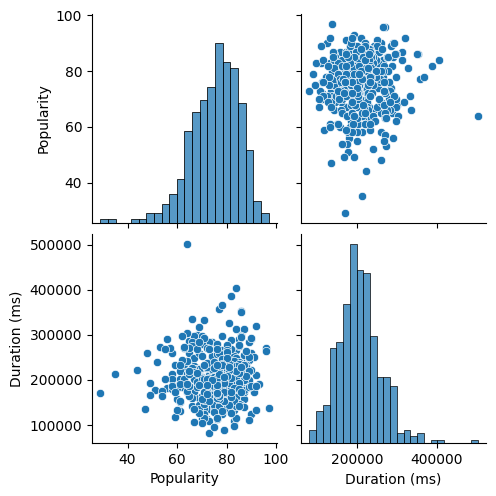

In [82]:
#  Visualize relationships between multiple numerical variables simultaneously using a pair plot
sns.pairplot(df4 )

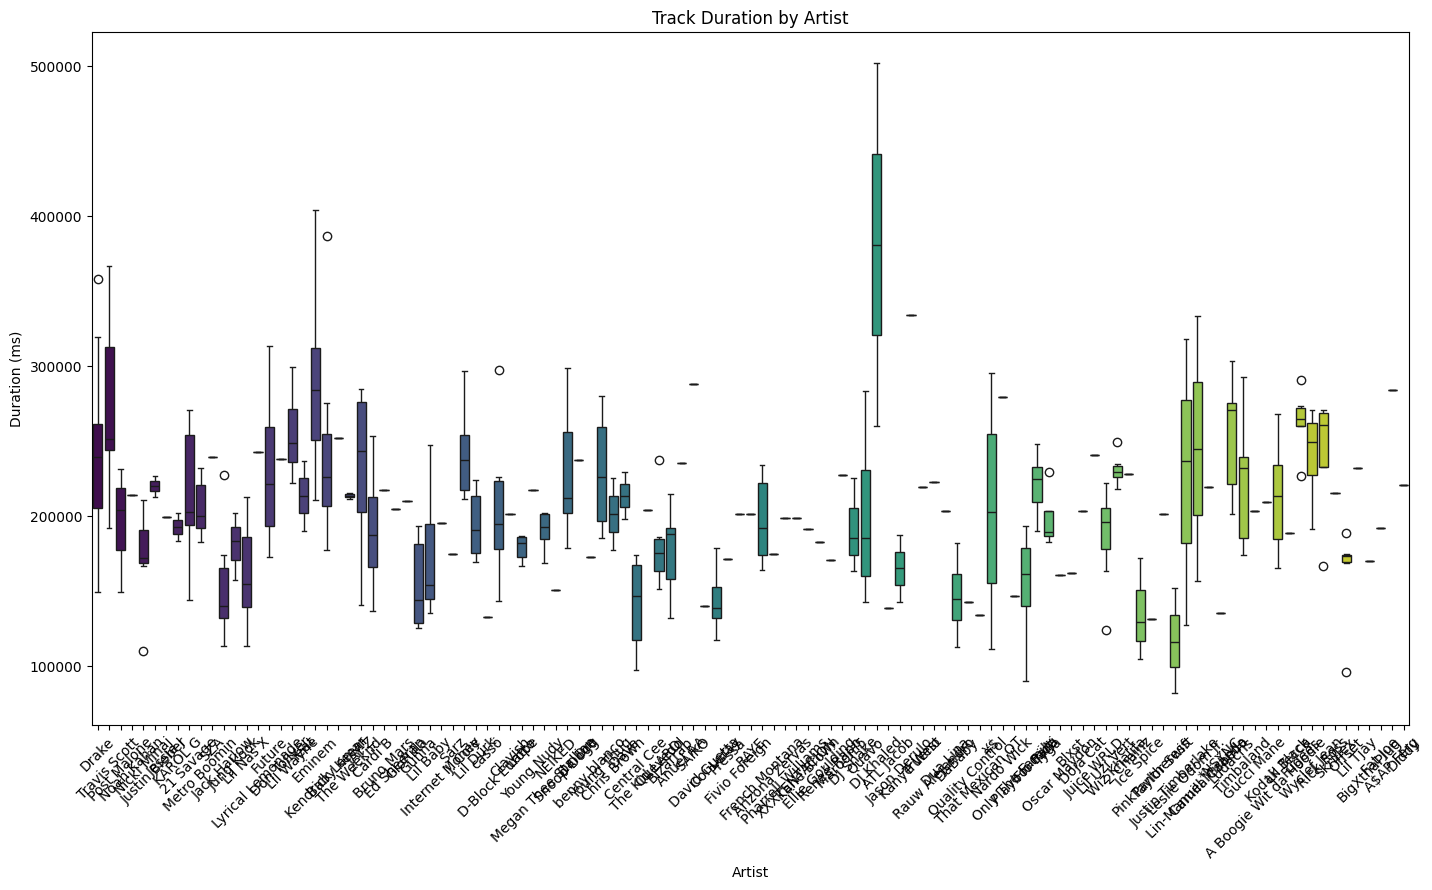

115

In [84]:
# Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
plt.figure(figsize=(17, 9))
sns.boxplot(data=df4, x='Artist', y='Duration (ms)', palette='viridis')
plt.title('Track Duration by Artist')
plt.xticks(rotation=45)
plt.show()
len(df4['Artist'].unique())

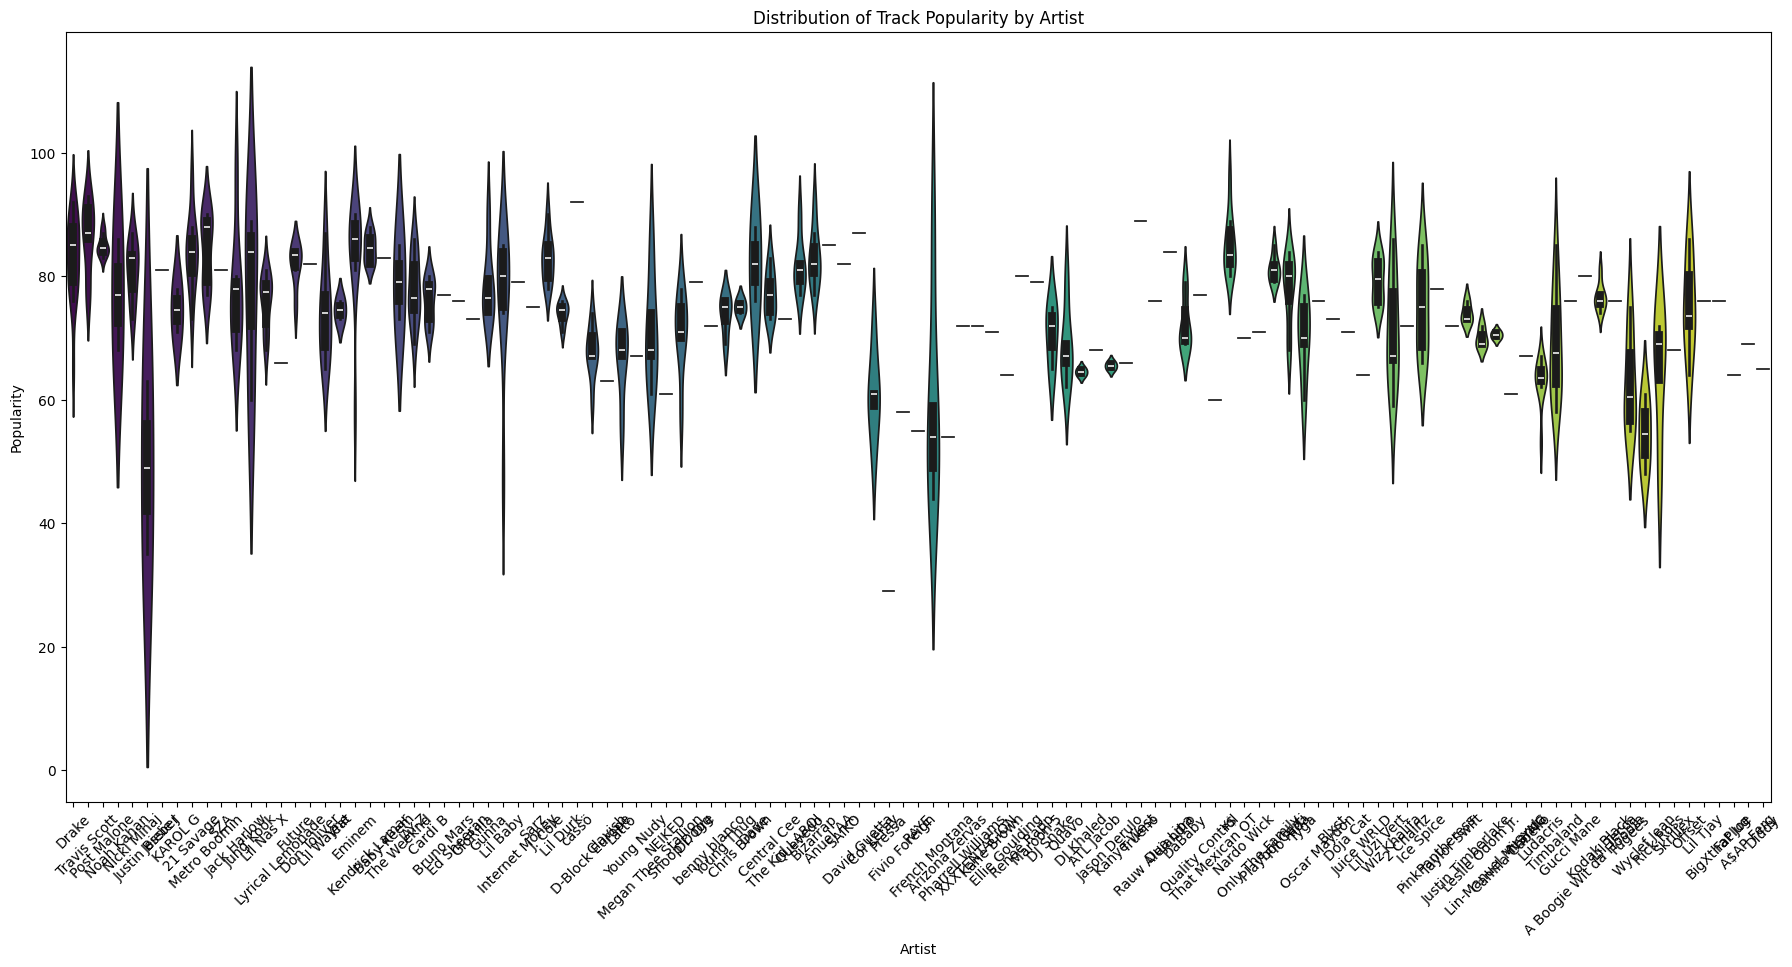

In [85]:
#  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violing plot
plt.figure(figsize=(22, 10))
sns.violinplot(data=df4, x='Artist', y='Popularity', palette='viridis')
plt.title('Distribution of Track Popularity by Artist')
plt.xticks(rotation=45)
plt.show()